<a href="https://colab.research.google.com/github/smirnovaanastasia1234/MOMO_Task-4/blob/main/%D0%9C%D0%9E%D0%9C%D0%9E_%D0%97%D0%B0%D0%B4%D0%B0%D0%BD%D0%B8%D0%B5_4_%D0%A7%D0%B0%D1%81%D1%82%D1%8C1_%D0%9C%D0%B5%D1%82%D0%BE%D0%B4_%D0%B3%D0%BB%D0%B0%D0%B2%D0%BD%D1%8B%D1%85_%D0%BA%D0%BE%D0%BC%D0%BF%D0%BE%D0%BD%D0%B5%D0%BD%D1%82.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Практическое задание №4_Часть1_Метод главных компонент**



# **Import библиотек**

In [2]:
from sklearn.decomposition import PCA

import numpy as np
import pandas as pd
from google.colab import files 

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

import seaborn as sns

from sklearn.datasets import fetch_openml

from sklearn.preprocessing import MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.datasets import make_moons, make_circles

from sklearn import datasets, svm, metrics
from sklearn.metrics import classification_report

from sklearn.datasets import make_blobs
from sklearn.metrics import confusion_matrix

In [3]:
plt.style.use('dark_background')

# **Метод главных компонент**

## **Синтетические данные**

### **Генерация данных**

In [4]:
# C1 и C2 –координаты центра, S1 и S2 радиусы эллипса, theta угол наклона, N количество точек
def create_elipsoid_data(C1 = 0,C2 = 0 ,S1 = 8,S2 =2, theta =65, N = 250, random_state = 42):
   if random_state: np.random.seed(random_state)
 
   theta = np.pi*theta/180
   Centers = np.array([C1,C2])
   Sigmas = np.array([S1,S2])
   R = np.array([[np.cos(theta), - np.sin(theta)],
   [np.sin(theta), np.cos(theta)]])
   return (R @ np.diag(Sigmas) @ np.random.randn(2, N)+np.diag(Centers)@ np.ones((2, N))).T


Визуализируем данные

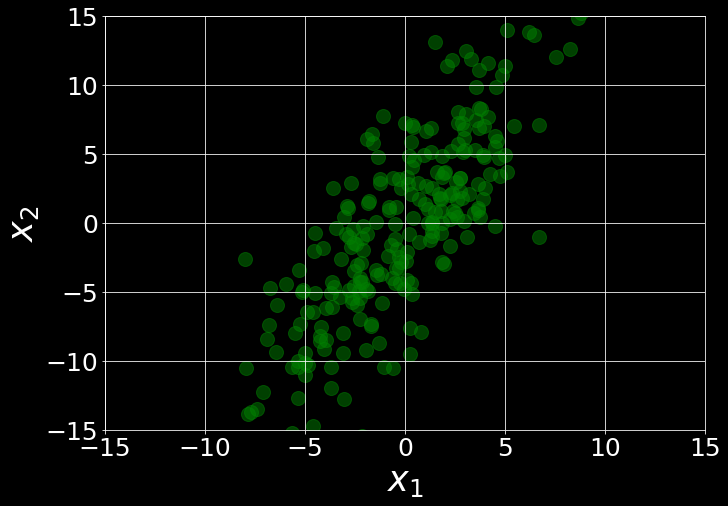

In [5]:
X =create_elipsoid_data(C1 = 0, C2 = 0, S1 = 8, S2 =2, theta =65, N = 250, random_state = 42) 

fig  = plt.figure(figsize=(10,7))
plt.scatter(X[:, 0],X[:, 1],
            alpha = 0.5, s = 196,
            c = 'green', edgecolor = 'g');
plt.grid()

plt.xlabel(r'$x_1$',fontsize=35)
plt.ylabel(r'$x_2$',fontsize=35)
plt.xticks(FontSize = 25)
plt.yticks(FontSize = 25)
plt.tight_layout()
plt.xlim((-15,15))
plt.ylim((-15,15));

### **Применение метода главных компонент**

Сразу создаем класс

In [6]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):
        # обучение - в этом случае сводится к нахождению собственных значений и собственных векторов

        self.mean = np.mean(X, axis=0) # оценка среднего для каждого признака
        
        # Считаем матрицу ковариации, используя функцию библиотеки Numpy
        cov_matrix = np.cov(X - self.mean, rowvar = False) # не забываем вычитать среднее
        

        # считаем собственные значания и собственные вектора матрицы ковариации
        eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix) # для этого тоже есть функция Numpy 


        idx = eigenvalues.argsort()[::-1] #Сортируем по возрастанию собственных значений
        
        # Берём первые n собственных векторов
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx] # отсортированные собственные значения
        
        return self
    
    #--------------------------------
    def transform(self, X):
        # преобразование признаков в пространство главных компонент
        X = X - self.mean #вычитаем среднее
        return np.dot(X, self.components) #находим проекции признаков на собственные вектора (через скалярное произведение)
        #это и будут главные компоненты
    #--------------------------------
    def fit_transform(self, X):
        # 2 в 1: обучаем и прелбразуем
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        # обратное преобразование
        # Главные компоненты скалярно домножаем на собственные вектора
        return np.dot(X_new, self.components.T) + self.mean # не забываем обратно добавить среднее
    #--------------------------------
    def score(self, X):
        # оцека "качества" восстановления, через коэффициент детерминации
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(15,7)):
        # метод для отрисовки собственных значений (объясненной дисперсии)
        plt.figure(figsize=figsize)
        # отдельно мелкими точками визуализируем все собственные значения
        plt.plot(self.values,'.',
                 label='Все собственные значения',
                 linewidth = 3)
        # крупными маркерами - выбранное нами количество гласвных компонент
        plt.plot(self.values[:self.n_components],'r-o',
                 label='Собственное Пространство',
                 markersize = 10, mfc='none',
                 linewidth = 2, alpha = 0.8)
        plt.ylabel('собственные\n значения', fontsize=25)
        plt.grid();
        plt.legend(fontsize=25);
        plt.xticks(FontSize = 25); plt.yticks(FontSize = 25);
        plt.tight_layout();      

In [7]:
def plot_scatter(x,y,title_x = '', title_y = ''):
    fig = plt.figure(figsize=(10,7))
    plt.grid()

    plt.scatter(x,y,
                alpha = 0.5, s = 196,
                c = 'green', edgecolor = 'g')
    plt.xlabel(title_x,fontsize=35)
    plt.ylabel(title_y,fontsize=35)
    plt.xticks(FontSize = 25)
    plt.yticks(FontSize = 25);
    plt.xlim([-20,20])
    plt.ylim([-20,20])
    plt.tight_layout();

In [8]:
pca = PCA(n_components = 2)
pca.fit(X)
pca.score(X)

1.0

Считаем пространство главных компонент

### **Визуализируем пространство главных компонент**

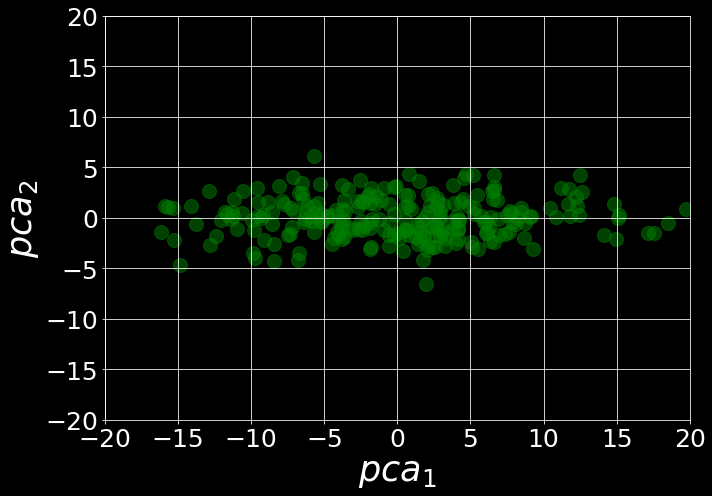

In [9]:
X_new = pca.transform(X) # воспользуемся методом transform

# И делаем стандартную визуализацию
plot_scatter(X_new[:,0],X_new[:,1],r'$pca_1$', r'$pca_2$')

### **Cобственные значения и собственные вектора**

In [10]:
Eigen_Vectors = pca.components
Eigen_Values = pca.values
print('Собственные векторы:', Eigen_Vectors)
print('Собственные числа: ', Eigen_Values)

Собственные векторы: [[ 0.42692403 -0.9042875 ]
 [ 0.9042875   0.42692403]]
Собственные числа:  [59.72988461  3.98334219]


Выполним аффинное преобразование единичной окружности, используя собственные вектора для определения угла наклона эллипса, а собственные значения как характерный размер вдоль соответсвующей оси эллипса

In [11]:
X_mean = np.mean(X, axis = 0)

theta_ = 2 * np.pi * np.arange(0,1,0.01)

X_std = Eigen_Vectors @ np.diag(np.sqrt(Eigen_Values)) @ np.array([np.cos(theta_),np.sin(theta_)])

Выполним визуализацию исходных данных, эллипсов полученыых из собственных значений и векторов, с поправкой на среднее значение, а также базис из главных компонент

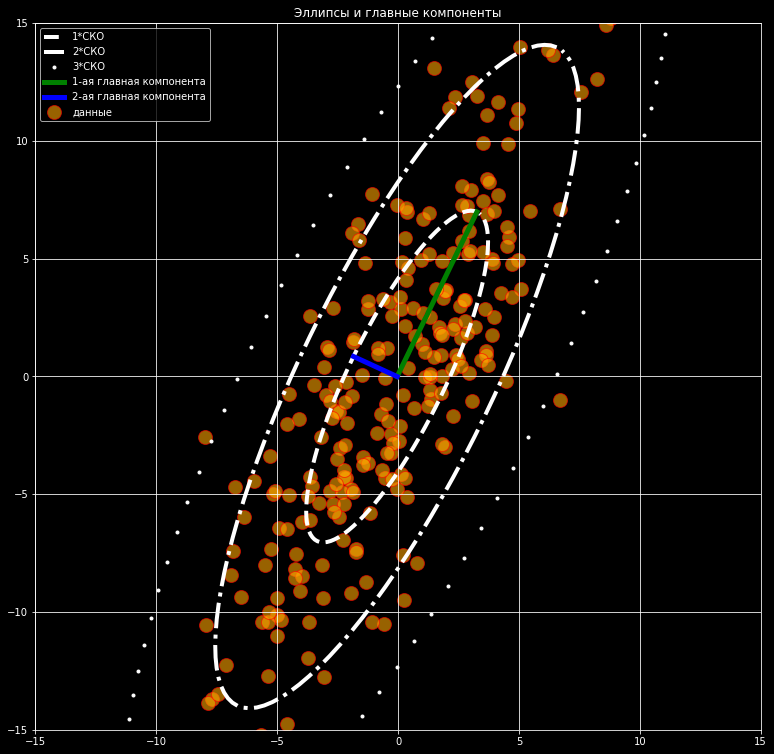

In [12]:
fig = plt.figure(figsize=(13,13))
# рисуем данные
plt.scatter(X[:,0],X[:,1], alpha = 0.6, label = 'данные',s = 196, c = 'orange', edgecolor = 'r')
# рисуем эллипс с "диаметром" ~ 1*СКО
plt.plot(X_std[0,:]+X_mean[0],X_std[1,:]+X_mean[1], 
         '--', c = 'w', linewidth = 4, label = '1*СКО')
#рисуем эллипс с "диаметром" ~ 2*СКО
plt.plot(2*X_std[0,:]+X_mean[0],2*X_std[1,:]+X_mean[1],
         '-.', c = 'w', linewidth = 4, label = '2*СКО')
#рисуем эллипс с "диаметром" ~ 3*СКО
plt.plot(3*X_std[0,:]+X_mean[0],3*X_std[1,:]+X_mean[1],
         '.', c = 'w', linewidth = 4, label = '3*СКО')
# 1-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,0]*np.sqrt(Eigen_Values[0])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,0]*np.sqrt(Eigen_Values[0])]),
         'g',linewidth = 5, label = '1-ая главная компонента')
# 2-ая главная компонента
plt.plot(np.array([X_mean[0], X_mean[0]+Eigen_Vectors[0,1]*np.sqrt(Eigen_Values[1])]),
         np.array([X_mean[1], X_mean[1]+Eigen_Vectors[1,1]*np.sqrt(Eigen_Values[1])]),
         'b',linewidth = 5, label = '2-ая главная компонента')
plt.xlim((-15,15))
plt.ylim((-15,15))
plt.title('Эллипсы и главные компоненты')
plt.legend()
plt.grid()

In [13]:
X_new[:, 0],X_new[:, 1]

(array([  4.00519836,  -1.09529674,   5.18079922,  12.19381605,
         -1.83921693,  -1.84893213,  12.64104452,   6.16567612,
         -3.74043821,   4.35259884,  -3.6789462 ,  -3.70569351,
          1.9860444 , -15.27678838, -13.77724792,  -4.46684389,
         -8.09854918,   2.54709034,  -7.24038845, -11.28000931,
         11.73088383,  -1.77299544,   0.54869129, -11.37841776,
         -4.32613996,   0.90251116,  -9.19020184,   3.03079576,
         -4.786183  ,  -2.31032223,  -4.79514211,  14.83129563,
         -0.10352712,  -8.43028108,   6.57953093,  -9.7285337 ,
          1.69186984, -15.66324378, -10.60850494,   1.60033154,
          5.9291817 ,   1.39515648,  -0.90003342,  -2.39734785,
        -11.81190203,  -5.7325612 ,  -3.67408962,   8.47349518,
          2.76071917, -14.09061479,   2.62006425,  -3.05575863,
         -5.40288709,   4.90708508,   8.26763786,   7.46857678,
         -6.70628165,  -2.44850766,   2.66440946,   7.82573222,
         -3.81174374,  -1.47617078,  -8.

## **Набор данных MNIST**

In [14]:
# воспользуемся функцией fetch_openml для загрузки данных с сайта OpenML
# для этого нам необходимо знать имя набора данных и версию
# также указываем что хотим чтобы скачалось в формате признаки/целевые метки (return_X_y)
# иначе он выгрузит в формате словаря с полной выкладкой
# наконец попросим выгрузить данные в формате dataframe (as_frame)
# иначе будут numpy массивы
X, y  = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame = True)
X = X / 255. # нормализуем данные - из диапазона от 0 до 255 в диапазон от 0 до 1
X_ = X.values # отдельно сохраним данные в формате numpy

Посмотрим на таблицу данных

In [ ]:
X

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


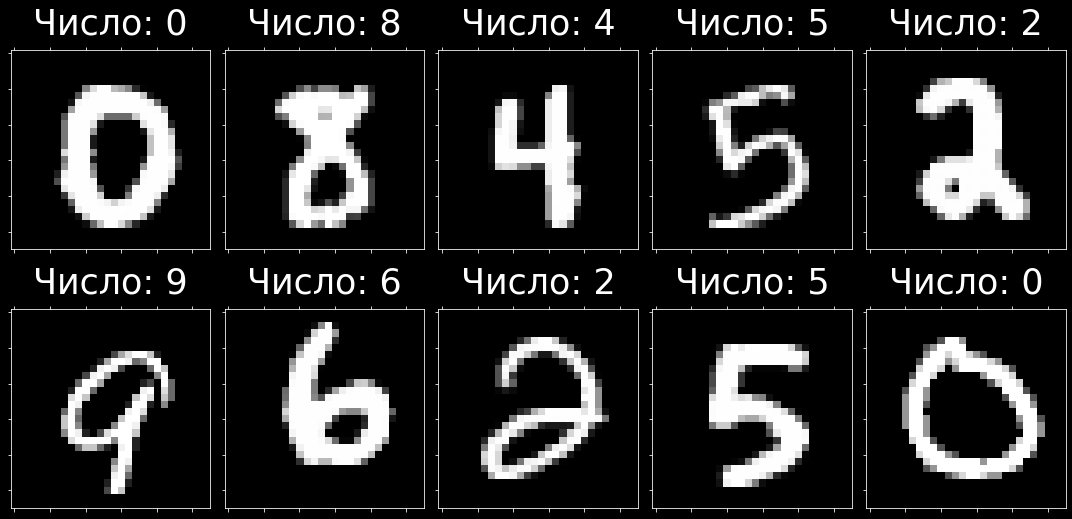

In [15]:
n = 25399
fig = plt.figure( figsize=(15,8) )
for i in range(0,10):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Число: {}".format(str(y[i+n]) ), size=35)
  ax.matshow(1-X.loc[i+n,'pixel1':'pixel784'].values.reshape((28,28)).astype(float),
             cmap='Greys')
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)
  plt.tight_layout()

### **Применяем Метод Главных Компонент к Данным MNIST (n_components=1850)**

In [16]:
pca = PCA(n_components = 1850)
pca.fit(X_)
pca.score(X_)

1.0

Оцениваем пространство главных компонент

In [17]:
pca_result_mnist = pca.transform(X_)

Восстанавливаем исходные изображения из 250 главных компонент

In [18]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

Убеждаемся что размерность восстановленного изображения верная

In [19]:
pca_inverse.shape

(70000, 784)

Визуализируем

Собственные значения

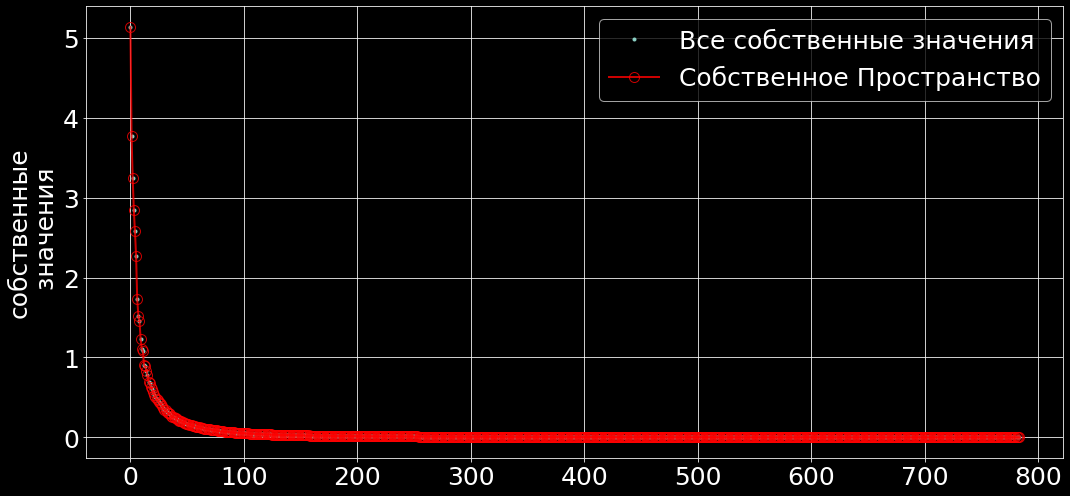

In [20]:
pca.plot_eigvalues();

In [21]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)  
    Входные переменные:
    ===========
    data: данные
    y: целевые метки 
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2 
    fig, sub = plt.subplots(2, 2, figsize = (11,11)) 

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом 
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15) # собираем легенду
        ax.add_artist(legend1)

Генерируем подписи к осям

In [22]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

Пространство Главных Компонент

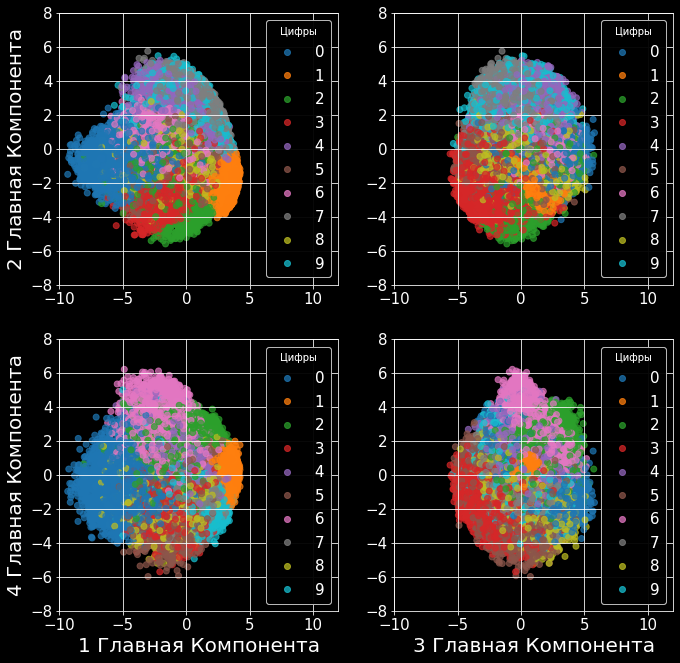

In [23]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

Восстановление данных

Сравним восстановленные изображения с исходными

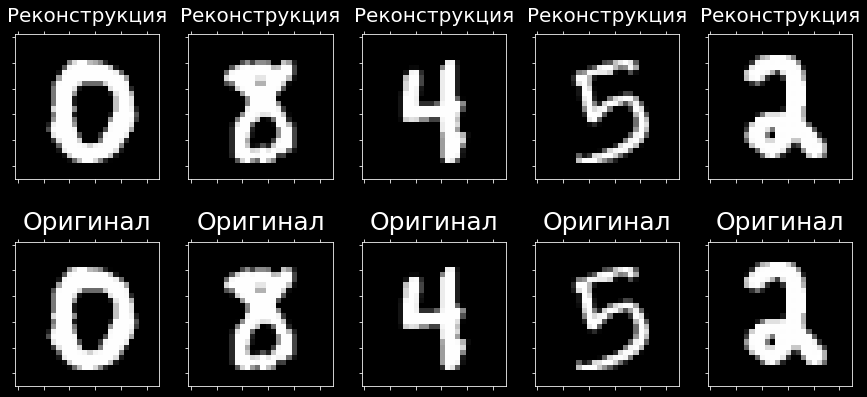

In [24]:
fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)  
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)    
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

### **Применяем Метод Главных Компонент к Данным MNIST (n_components=10)**

In [25]:
pca = PCA(n_components = 10)
pca.fit(X_)
pca.score(X_)

0.6387523030501321

Оцениваем пространство главных компонент

In [26]:
pca_result_mnist = pca.transform(X_)

Восстанавливаем исходные изображения из 350 главных компонент

In [27]:
pca_inverse = pca.inverse_transform(pca_result_mnist)

Убеждаемся что размерность восстановленного изображения верная

In [28]:
pca_inverse.shape

(70000, 784)

Визуализируем

Собственные значения

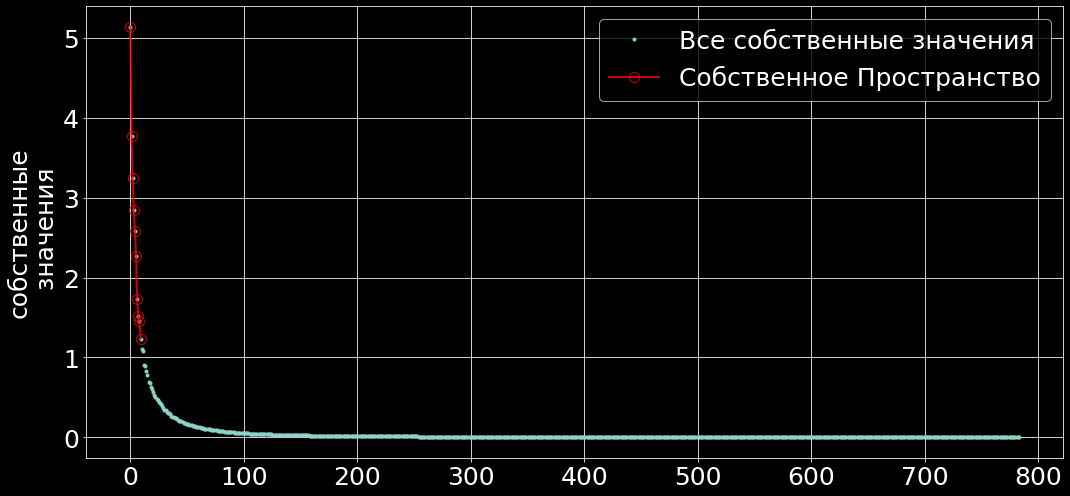

In [29]:
pca.plot_eigvalues();

In [30]:
def plot_multi(data, y,  names):
    """Нескольких двумерных проекций многомерных данных (pairplot на минималках)  
    Входные переменные:
    ===========
    data: данные
    y: целевые метки 
    names: подписи к осям
    """
    # собираем оси данных, которые мы визуализируем
    axis = [[0,1],
            [2,1],
            [0,3],
            [2,3],]

    # собираем подписи к осям в нужном порядке
    labels = [['',names[1]],
            ['',''],
            [names[0],names[3]],
            [names[2],'']]

    # создаем полотно 2 на 2 
    fig, sub = plt.subplots(2, 2, figsize = (11,11)) 

    # в каждом графике этого полотна мы визуализируем соответсвующие проекции
    for n, (axi, label, ax) in enumerate(zip(axis,  labels, sub.flatten())):
        # визуализация - стандартная скатерограмма
        scatter = ax.scatter(data[:,axi[0]],data[:,axi[1]],
                             c=y,  # разные метки будут подсвечены разным цветом 
                             s = 36, cmap = 'tab10',
                             alpha = 0.7, facecolors = 'none' );
        ax.set_ylabel(label[1], fontsize = 20)
        ax.set_xlabel(label[0], fontsize = 20)
        ax.tick_params(axis='x', labelsize= 15)
        ax.tick_params(axis='y', labelsize= 15)     
        ax.grid()
        ax.set_xlim([-10,12])
        ax.set_ylim([-8,8])
        legend1 = ax.legend(*scatter.legend_elements(),
                        loc="upper right", title="Цифры",
                        fontsize = 15) # собираем легенду
        ax.add_artist(legend1)

Генерируем подписи к осям

In [31]:
pca_names = [str(x+1)+' Главная Компонента' for x in range(4)]

Пространство Главных Компонент

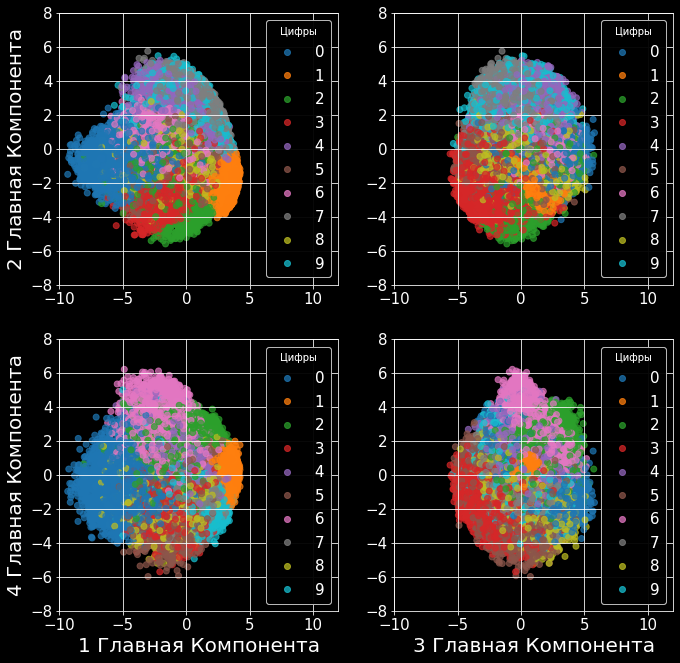

In [32]:
plot_multi(pca_result_mnist, y.astype(int), pca_names);

Восстановление данных

Сравним восстановленные изображения с исходными

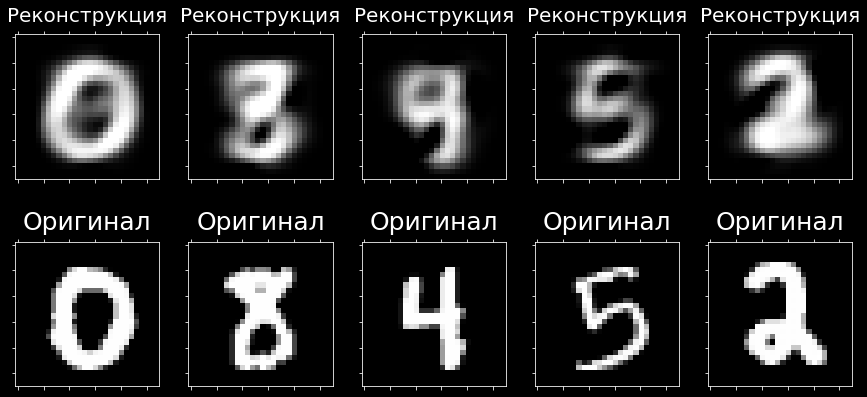

In [33]:
fig=plt.figure(figsize=(15,7))
for i in range(0,5):
  ax = fig.add_subplot(2,5,i+1)
  ax.set_title("Реконструкция", size=20)  
  ax.matshow(1-pca_inverse[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

for i in range(0,5):
  ax = fig.add_subplot(2,5,i+6)
  ax.set_title("Оригинал", size=25)    
  ax.matshow(1-X_[i+n,:].reshape((28,28)).astype(float),cmap='Greys', vmin = 0, vmax = 1)
  plt.setp(ax.get_xticklabels(), visible=False)
  plt.setp(ax.get_yticklabels(), visible=False)

При количестве компонент =10 данные MNIST значительно ухудшились. Таким образом , чем меньше количество компонент, тем хуже результат

### **В пространстве главных компонент для данных MNIST определите, каким цифрам соответствуют точки с заданными координатами**

В пространстве главных компонент для данных MNIST определите, каким цифрам соответствуют точки со следующими координатами:


*   PCA-1 -7; PCA-2 0; Цифра 0
*   PCA-1 4; PCA-4 1; Цифра 1
*   PCA-3 0; PCA-4 5; Цифра 2
*   PCA-3 -4; PCA-2 -3. Цифра 5


## **Набор данных Cars Moldova**

### **Загрузка данных на Google Drive**

загружаем файл после стандартизации из задания 1

In [ ]:
uploaded = files.upload()

Saving cars_moldova_clean.csv to cars_moldova_clean.csv


### **Считываем файл в DataFrame**

метод .read_csv(path,delimiter)

In [ ]:
df = pd.read_csv('/content/cars_moldova_clean.csv', delimiter = ',')
df

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,Toyota,Prius,2011,Hatchback,195000.0,1800.0,Hybrid,Automatic,7750.0,11,17727.272727
1,Renault,Grand Scenic,2014,Universal,135000.0,1500.0,Diesel,Manual,8550.0,8,16875.000000
2,Renault,Laguna,2012,Universal,110000.0,1500.0,Diesel,Manual,6550.0,10,11000.000000
3,Opel,Astra,2006,Universal,200000.0,1600.0,Metan/Propan,Manual,4100.0,16,12500.000000
4,Mercedes,Vito,2000,Microvan,300000.0,2200.0,Diesel,Manual,3490.0,22,13636.363636
...,...,...,...,...,...,...,...,...,...,...,...
32215,Volkswagen,Passat,2016,Sedan,88000.0,1800.0,Petrol,Automatic,11500.0,6,14666.666667
32216,Land Rover,Freelander,2002,Crossover,225000.0,1800.0,Metan/Propan,Manual,4400.0,20,11250.000000
32217,Dacia,Logan Mcv,2015,Universal,89000.0,1500.0,Diesel,Manual,7000.0,7,12714.285714
32218,Mazda,6,2006,Combi,370000.0,2000.0,Diesel,Manual,4000.0,16,23125.000000


In [ ]:
# общая информация о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32220 entries, 0 to 32219
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Make                  32220 non-null  object 
 1   Model                 32220 non-null  object 
 2   Year                  32220 non-null  int64  
 3   Style                 32220 non-null  object 
 4   Distance              32220 non-null  float64
 5   Engine_capacity(cm3)  32220 non-null  float64
 6   Fuel_type             32220 non-null  object 
 7   Transmission          32220 non-null  object 
 8   Price(euro)           32220 non-null  float64
 9   Age                   32220 non-null  int64  
 10  km_year               32220 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 2.7+ MB


In [ ]:
# определим категориальные и численные столбцы
cat_columns = ['Make', 'Model', 'Style', 'Fuel_type', 'Transmission'] 
num_columns = ['Year', 'Distance', 'Engine_capacity(cm3)', 'Price(euro)', 'km_year']

In [ ]:
df[cat_columns] = df[cat_columns].astype('category')

for _, column_name in enumerate(cat_columns):
    df[column_name] =  df[column_name].cat.codes
df.head()

,Make,Model,Year,Style,Distance,Engine_capacity(cm3),Fuel_type,Transmission,Price(euro),Age,km_year
0,40,92,2011,4,195000.0,1800.0,2,0,7750.0,11,17727.272727
1,32,62,2014,11,135000.0,1500.0,0,1,8550.0,8,16875.000000
2,32,71,2012,11,110000.0,1500.0,0,1,6550.0,10,11000.000000
3,28,23,2006,11,200000.0,1600.0,3,1,4100.0,16,12500.000000
4,23,126,2000,5,300000.0,2200.0,0,1,3490.0,22,13636.363636


### **Визуализируем пространство главных компонент и их связь с исходными признаками**

In [ ]:
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.values = None
        self.mean = None
    
    #--------------------------------    
    def fit(self, X):

        self.mean = np.mean(X, axis=0)
        
        # расчет матрицы ковариации
        cov_matrix = np.cov(X - self.mean, rowvar = False)
        
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        idx = eigenvalues.argsort()[::-1] #индексы сортировки по значениям собственных векторов
        
        # сортируем собственные вектора и значения
        self.components = eigenvectors[:, idx][:, :self.n_components]
        self.values     = eigenvalues[idx]
        
        return self
    
    #--------------------------------
    def transform(self, X):
        X = X - self.mean
        return np.dot(X, self.components)
    #--------------------------------
    def fit_transform(self, X):
        return self.fit(X).transform(X)
    #--------------------------------
    def inverse_transform(self, X_new):
        return np.dot(X_new, self.components.T) + self.mean
    #--------------------------------
    def score(self, X):
        SStot = np.sum(np.square(X - np.mean(X)))
        SSres = np.sum(np.square(X - self.inverse_transform(self.fit_transform(X))))
        return 1 - SSres/SStot
    #--------------------------------
    def plot_eigvalues(self, figsize=(12,4)):
        plt.figure(figsize=figsize)
        plt.plot(self.values,'-o', label='all eigvalues')
        plt.plot(self.values[:self.n_components],'-o', label='eigen subspace')
        plt.title('eigenvalues');plt.legend();plt.show()
    

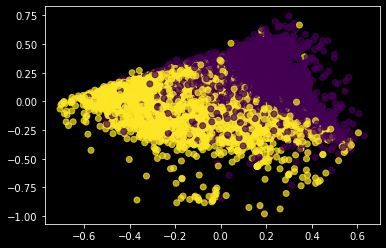

eigenvalues [0.03232532 0.02156535 0.01764129 0.00367911 0.00169463]


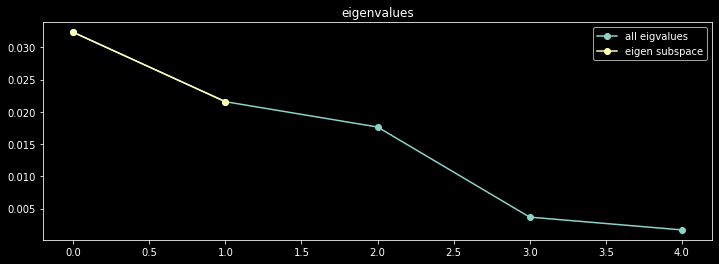

score: 0.9300943107938634


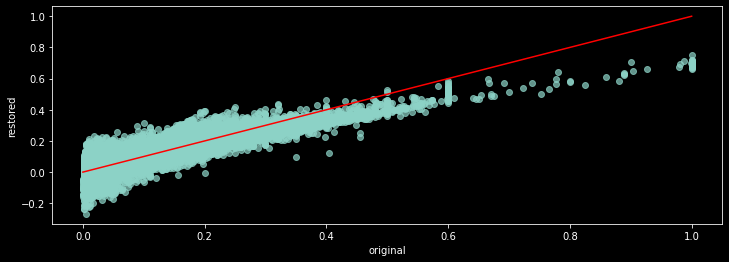

In [ ]:
df_num = df[num_columns].copy()
scaler = MinMaxScaler()
X = scaler.fit_transform(df_num)

labels = df.Transmission.values

pca = PCA(n_components = 2)
pca.fit(X)
X_new = pca.transform(X)
plt.scatter(X_new[:,0], X_new[:,1], c =labels, alpha = 0.7); 
plt.show()

print('eigenvalues',pca.values)
pca.plot_eigvalues()

print('score:',pca.score(X))

X2 = pca.inverse_transform(X_new)
plt.figure(figsize=(12,4))
plt.scatter(X[:,1],X2[:,1],alpha = 0.7 )
plt.plot([X[:,1].min(),X[:,1].max()],[X[:,1].min(),X[:,1].max()], 'r')
plt.xlabel('original')
plt.ylabel('restored');

Визуализация "весов" главных компонент

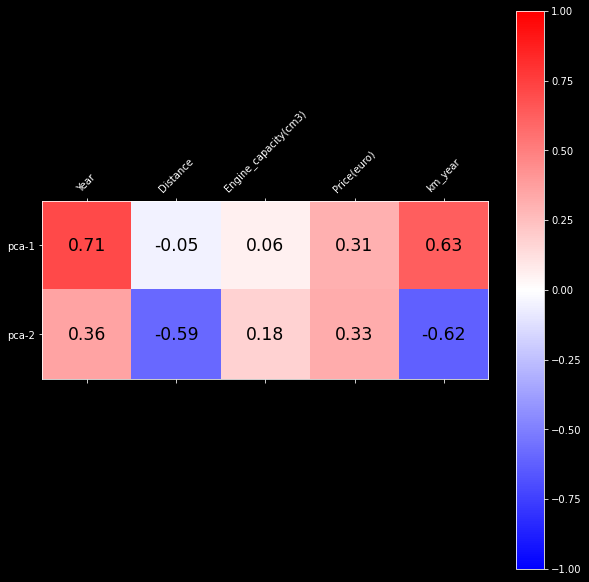

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(2)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'xx-large')
plt.xticks(np.arange(0, W.shape[1]), df[num_columns].columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

Проверим как работает PCA на категориальных данных

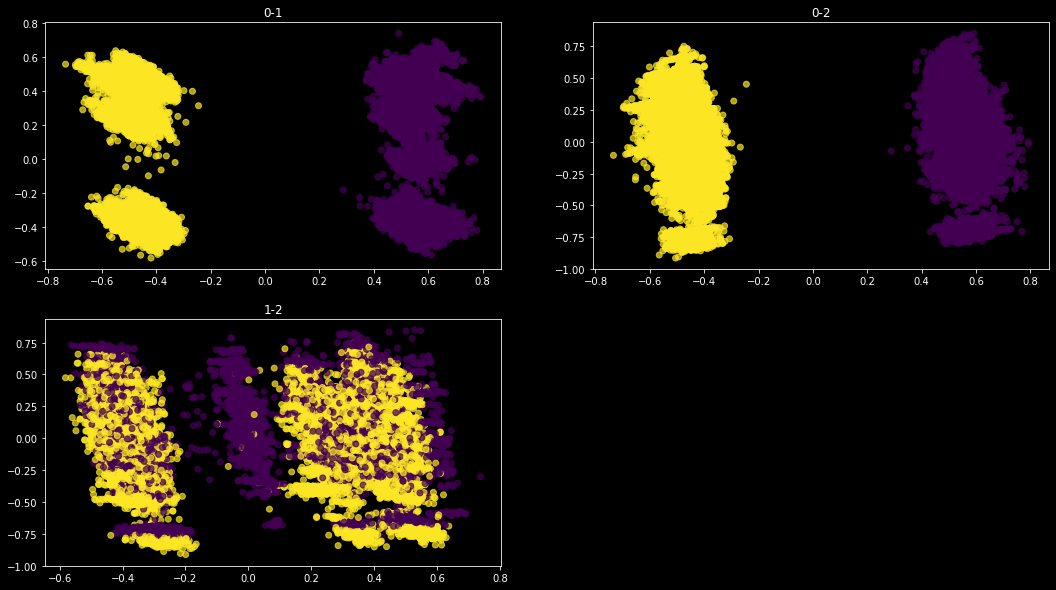

score: 0.8132408355100985


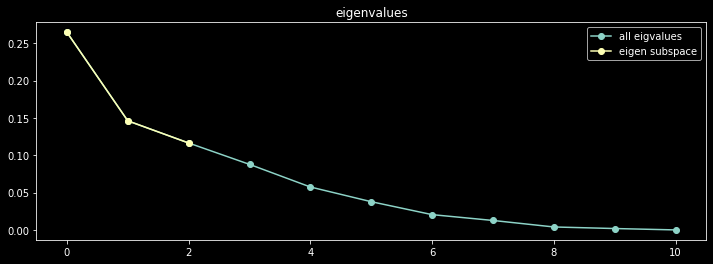

In [ ]:
scaler    = MinMaxScaler()
X_cluster = scaler.fit_transform(df)
pca = PCA(n_components=3)

X_new = pca.fit_transform(X_cluster)
X_new.shape

plt.figure(figsize=(18,10))
plt.subplot(221); plt.scatter(X_new[:,0],X_new[:,1], c =labels, alpha = 0.7); plt.title("0-1")
plt.subplot(222); plt.scatter(X_new[:,0],X_new[:,2], c =labels, alpha = 0.7); plt.title("0-2")
plt.subplot(223); plt.scatter(X_new[:,1],X_new[:,2], c =labels, alpha = 0.7); plt.title("1-2")
plt.show();

print('score:',pca.score(X_cluster))
pca.plot_eigvalues()

In [ ]:
print('eigenvalues',np.cumsum(pca.values))

eigenvalues [0.26463942 0.41071242 0.52707593 0.61482111 0.67227781 0.71004573
 0.73049742 0.74315251 0.74709538 0.74894699 0.74894699]


Визуализация "весов" главных компонент

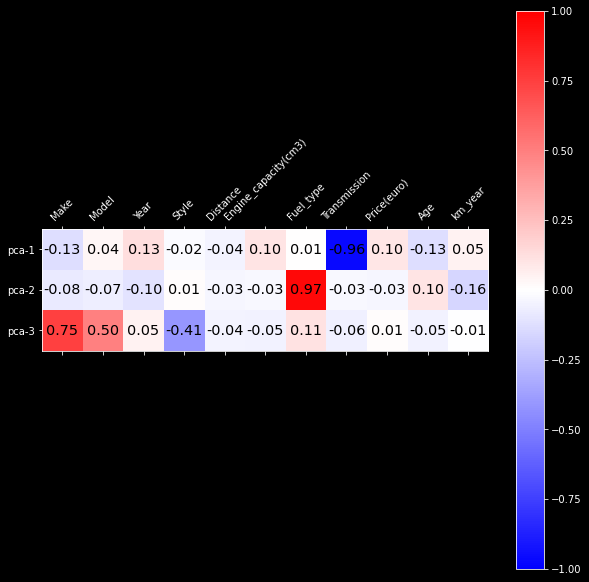

In [ ]:
fig=plt.figure(figsize=(10,10))
W = pca.components.T
pca_names = ['pca-'+str(x+1) for x in range(3)]
plt.matshow(W.astype(float),cmap='bwr',vmin=-1,vmax=1, fignum=1)
for (i, j), z in np.ndenumerate(W):
    plt.text(j, i, '{:0.2f}'.format(z), ha='center', va='center', color = 'k', fontsize = 'x-large')
plt.xticks(np.arange(0, W.shape[1]), df.columns,rotation = 45)
plt.yticks(np.arange(0, W.shape[0]),pca_names)
plt.colorbar();

### **Применение пространств главных компонент в качестве входных данных для алгоритмов классификации**

In [ ]:
X = df.drop(('Style'), axis = 1) # убираем столбец 'Style'
y = df['Style']
feature_names = X.columns

In [ ]:
print(X.shape)
print(y.shape)
N, d = X.shape

(32220, 10)
(32220,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 
print(N_train, N_test)

25776 6444


In [ ]:
pca = PCA(n_components=2)
pca.fit(X_train)

In [ ]:
print(pca.components)


[[-9.95569745e-07  1.60306281e-04]
 [ 3.07264369e-05 -3.15846572e-04]
 [ 3.25420449e-05 -4.22605007e-04]
 [-9.98765752e-01 -1.75341672e-02]
 [-4.11389537e-04 -2.32609563e-02]
 [ 2.54943683e-06  4.26524168e-05]
 [-1.04773969e-06  2.37917750e-05]
 [ 3.51984224e-02 -9.09856253e-01]
 [-3.25420449e-05  4.22605007e-04]
 [-3.50410076e-02 -4.13899257e-01]]


In [ ]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
knn = KNeighborsClassifier(n_neighbors = 10, metric='hamming', n_jobs = 4)
knn.fit(X_train_pca, y_train)
y_train_predict_pca = knn.predict(X_train_pca)
y_test_predict_pca = knn.predict(X_test_pca)
err_train_pca = np.mean(y_train != y_train_predict_pca)
err_test_pca  = np.mean(y_test  != y_test_predict_pca)
print(err_train_pca)
print(err_test_pca)

0.696772191185599
0.6978584729981379
